In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv


### Importing Matplotlib and Seaborn for visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the dataset while assigning the country column as the index.

In [3]:
df = pd.read_csv('/kaggle/input/quality-of-life-for-each-country/Quality_of_Life.csv', index_col = ['country'])

## Checking the basic overview of the data we have:

In [4]:
df.head()

,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'


# Cleaning Data:

### We first remove the spaces from the column names for better typeability.

In [5]:
df.columns = df.columns.str.replace(" ", "")

### Here we get rid of the ' at the front and back of the values in every category column.

In [6]:
df['PurchasingPowerCategory'] = df['PurchasingPowerCategory'].str.strip("'")
df['SafetyCategory'] = df['SafetyCategory'].str.strip("'")
df['HealthCareCategory'] = df['HealthCareCategory'].str.strip("'")
df['ClimateCategory'] = df['ClimateCategory'].str.strip("'")
df['CostofLivingCategory'] = df['CostofLivingCategory'].str.strip("'")
df['PropertyPricetoIncomeCategory'] = df['PropertyPricetoIncomeCategory'].str.strip("'")
df['TrafficCommuteTimeCategory'] = df['TrafficCommuteTimeCategory'].str.strip("'")
df['QualityofLifeCategory'] = df['QualityofLifeCategory'].str.strip("'")
df.head()

,PurchasingPowerValue,PurchasingPowerCategory,SafetyValue,SafetyCategory,HealthCareValue,HealthCareCategory,ClimateValue,ClimateCategory,CostofLivingValue,CostofLivingCategory,PropertyPricetoIncomeValue,PropertyPricetoIncomeCategory,TrafficCommuteTimeValue,TrafficCommuteTimeCategory,PollutionValue,PollutionCategory,QualityofLifeValue,QualityofLifeCategory
country,,,,,,,,,,,,,,,,,,
Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,NaN,21.08,Very Low,7.8,Low,56.17,Very High,84.44,'Very High',0.0,NaN
Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,NaN,53.44,Low,5.33,Low,19.05,Very Low,18.05,'Very Low',0.0,NaN
Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,'High',': 104.16',Low
Alderney,0.00,NaN,83.79,Very High,100.00,Very High,0.00,NaN,0.00,NaN,0.0,NaN,5.00,Very Low,1.72,'Very Low',0.0,NaN
Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.7,Very High,45.09,High,63.87,'High',': 98.83',Very Low


### We view what the types of categories present in the dataset are:

In [7]:
df['PurchasingPowerCategory'].unique()

array(['Very Low', 'Very High', 'Low', nan, 'Moderate', 'High'],
      dtype=object)

### Since there is no clarificaton on what value ranges each category represents, we find that out ourselves.

In [8]:
filt_Vlow = df['PurchasingPowerCategory'] == 'Very Low'
filt_low = df['PurchasingPowerCategory'] == 'Low'
filt_Mod = df['PurchasingPowerCategory'] == 'Moderate'
filt_High = df['PurchasingPowerCategory'] == 'High'
filt_VHigh = df['PurchasingPowerCategory'] == 'Very High'
print("V Low Max is ", df[filt_Vlow]['PurchasingPowerValue'].max())
print("Low Min is ", df[filt_low]['PurchasingPowerValue'].min())
print("Low Max is ", df[filt_low]['PurchasingPowerValue'].max())
print("Moderate Min is ", df[filt_Mod]['PurchasingPowerValue'].min())
print("Moderate Max is ", df[filt_Mod]['PurchasingPowerValue'].max())
print("High Min is ", df[filt_High]['PurchasingPowerValue'].min())
print("High Max is ", df[filt_High]['PurchasingPowerValue'].max())
print("V High Min is ", df[filt_VHigh]['PurchasingPowerValue'].min())



V Low Max is  39.16
Low Min is  40.26
Low Max is  59.69
Moderate Min is  62.54
Moderate Max is  84.66
High Min is  85.89
High Max is  109.08
V High Min is  111.31


# The Range Values:
### Based on the observation above we can find the range of different categories:
#### V Low: 0 - 40
#### Low: 40 - 60
#### Moderate: 60 - 85
#### High: 85 - 110
#### V High: 110+

In [9]:
df.describe()

,PurchasingPowerValue,SafetyValue,HealthCareValue,ClimateValue,CostofLivingValue,TrafficCommuteTimeValue,PollutionValue
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,28.492966,54.266186
std,52.008245,16.914298,20.607381,40.851542,26.026565,17.347242,25.853695
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,17.100000,35.700000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,29.845000,59.765000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,38.870000,73.740000
max,281.830000,100.000000,100.000000,99.890000,137.370000,100.000000,106.900000


In [10]:
corr_data = df.select_dtypes(include = 'number')
corr = corr_data.corr()

In [11]:
mask = np.triu(corr)

<Axes: >

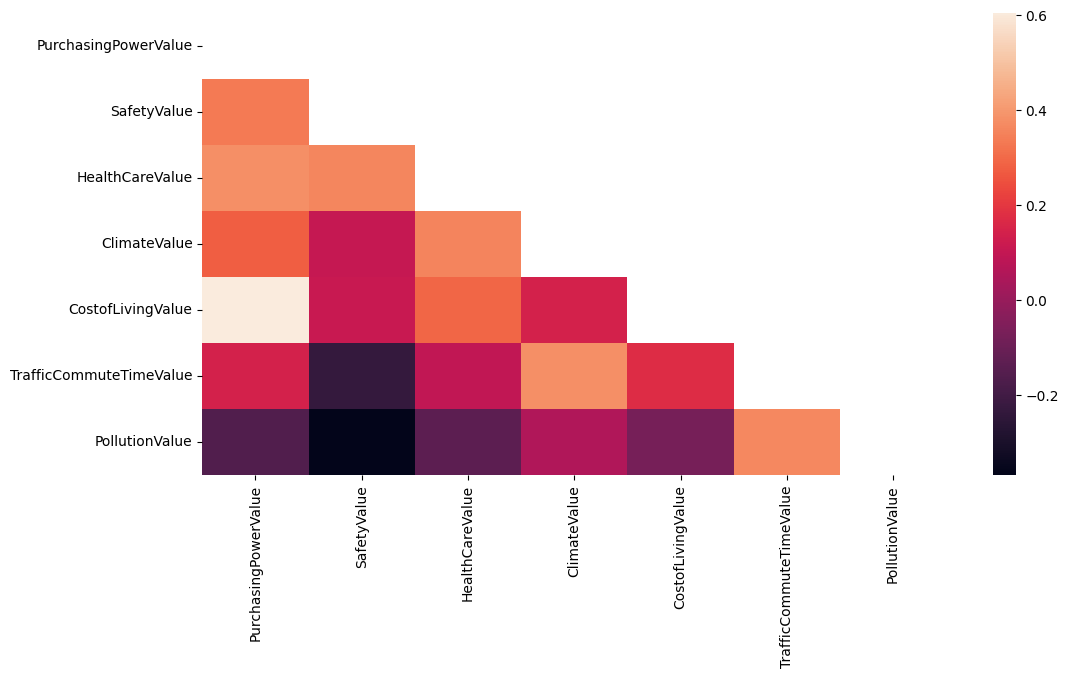

In [12]:
fig, ax = plt.subplots(figsize = (12,6))

sns.heatmap(corr, mask = mask)